<a href="https://colab.research.google.com/github/Hitenjain20/Sentiment-analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import keras
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore", category=FutureWarning)
from google.colab import drive
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/tweets_data.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [4]:
data = data.sample(frac=1)
data = data[:200000]

In [5]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [6]:
data.head(10)

,polarity,id,date,query,user,text
436837,0,2065774314,Sun Jun 07 09:15:48 PDT 2009,NO_QUERY,Hege0,I have oral exam on Tuesday
950345,4,1823970996,Sat May 16 23:35:35 PDT 2009,NO_QUERY,hirepasha,Hulu Rocks People!!!!! Cancel your cable
691043,0,2252151641,Sat Jun 20 05:35:12 PDT 2009,NO_QUERY,davidbarrett1,Scrapped movie plans - sold out! sadness
264811,0,1986976727,Sun May 31 19:36:17 PDT 2009,NO_QUERY,LizMyxx,http://twitpic.com/6dppz - i miss my chubby li...
1340627,4,2030861633,Thu Jun 04 08:59:22 PDT 2009,NO_QUERY,scottfmurphy,I am in such a good mood today
278872,0,1991637593,Mon Jun 01 07:23:58 PDT 2009,NO_QUERY,fuseboxradio,@soulpowr You know? And some of these same peo...
726910,0,2262694284,Sat Jun 20 23:02:08 PDT 2009,NO_QUERY,keshiachante,@SkibopMoss nooo.. whats that
1407164,4,2055464727,Sat Jun 06 09:21:55 PDT 2009,NO_QUERY,anavalesmil,Ahhhh!! i'm so happy my FIVEOHfirst CD is fina...
1523993,4,2176657191,Mon Jun 15 04:26:18 PDT 2009,NO_QUERY,Shaquantaelita,I'll be there sissy !!
246072,0,1982159787,Sun May 31 10:38:54 PDT 2009,NO_QUERY,fruitybat,Is already turning out to be a terrible roommate


In [7]:
data['polarity'].unique()

array([0, 4])

In [8]:
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
436837,0,2065774314,Sun Jun 07 09:15:48 PDT 2009,NO_QUERY,Hege0,I have oral exam on Tuesday
950345,1,1823970996,Sat May 16 23:35:35 PDT 2009,NO_QUERY,hirepasha,Hulu Rocks People!!!!! Cancel your cable
691043,0,2252151641,Sat Jun 20 05:35:12 PDT 2009,NO_QUERY,davidbarrett1,Scrapped movie plans - sold out! sadness
264811,0,1986976727,Sun May 31 19:36:17 PDT 2009,NO_QUERY,LizMyxx,http://twitpic.com/6dppz - i miss my chubby li...
1340627,1,2030861633,Thu Jun 04 08:59:22 PDT 2009,NO_QUERY,scottfmurphy,I am in such a good mood today


In [9]:
data.describe()

,polarity,id
count,200000.00000,2.000000e+05
mean,0.49913,1.998826e+09
std,0.50000,1.934496e+08
min,0.00000,1.467811e+09
25%,0.00000,1.957017e+09
50%,0.00000,2.001995e+09
75%,1.00000,2.176980e+09
max,1.00000,2.329204e+09


In [10]:
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99826
No. of negative tagged sentences is: 100174


In [11]:
def word_count(words):
    return len(words.split())

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


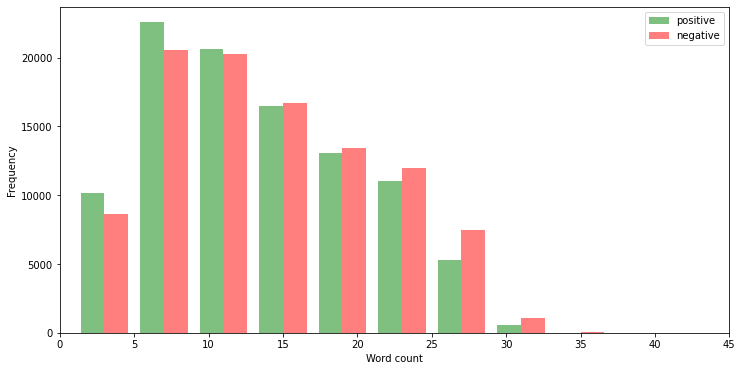

In [12]:
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [14]:
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 64981),
 ('and', 36878),
 ('you', 29894),
 ('for', 26898),
 ('have', 17906),
 ('that', 16075),
 ("i'm", 15906),
 ('just', 15707),
 ('but', 15569),
 ('with', 14241),
 ('not', 12812),
 ('was', 12712),
 ('this', 11071),
 ('get', 10162),
 ('good', 9681),
 ('are', 9468),
 ('like', 9401),
 ('all', 9295),
 ('out', 8595),
 ('your', 8193)]

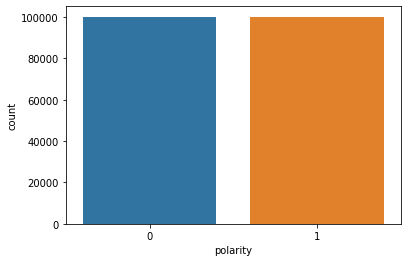

In [15]:
%matplotlib inline
sns.countplot(data['polarity'])

In [16]:
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [17]:
data.drop('id', axis=1, inplace=True)

In [18]:
data.head(10)

,polarity,text
436837,0,I have oral exam on Tuesday
950345,1,Hulu Rocks People!!!!! Cancel your cable
691043,0,Scrapped movie plans - sold out! sadness
264811,0,http://twitpic.com/6dppz - i miss my chubby li...
1340627,1,I am in such a good mood today
278872,0,@soulpowr You know? And some of these same peo...
726910,0,@SkibopMoss nooo.. whats that
1407164,1,Ahhhh!! i'm so happy my FIVEOHfirst CD is fina...
1523993,1,I'll be there sissy !!
246072,0,Is already turning out to be a terrible roommate


In [19]:
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [20]:
data['text'] = data['text'].astype('str')

In [21]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'during', 'why', 'with', 'down', 'being', 'do', 'than', 'these', 'same', 'shan', 'her', 'from', 'no', 'his', 'and', 'in', 'am', 'ours', 'wasn', 'should', 'himself', "shan't", "wouldn't", 'some', 'nor', 'there', 'until', "hadn't", 'itself', 'who', 'further', 'once', 'other', 'up', "you're", 'any', 'doesn', "weren't", 'this', 'here', "don't", 'm', 'our', "you've", 'their', 'under', 'by', 'my', 'can', 'd', 'whom', 'have', 'into', 'll', 'herself', 'shouldn', 'because', 're', 'what', 'for', 'only', 'having', 'not', 'which', "that'll", "didn't", 'those', 'while', 'when', 'are', 'if', "she's", 'wouldn', 'him', 'them', 'does', 'again', 'mustn', 'before', 'she', 'he', "you'll", 'as', "couldn't", 'don', "hasn't", 'they', "aren't", 'did', 'needn', 'its', 'me', 'been', 'ourselves', 'it', 'ma', "won't", 'each', 'has', 'an', 'yours', 'hadn', 'too', 'all', 'to', 'yourself', 'over', 'after',

In [22]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","", string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [27]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [28]:
data.head(10)

,polarity,text,processed_tweets
436837,0,I have oral exam on Tuesday,oral exam tuesday
950345,1,Hulu Rocks People!!!!! Cancel your cable,ulu rock people cancel cable
691043,0,Scrapped movie plans - sold out! sadness,crapped movie plan sold sadness
264811,0,http://twitpic.com/6dppz - i miss my chubby li...,ttptwitpiccom6dppz miss chubby little smurffff...
1340627,1,I am in such a good mood today,good mood today
278872,0,@soulpowr You know? And some of these same peo...,soulpowr know people talking quotrights unborn...
726910,0,@SkibopMoss nooo.. whats that,skibopmoss nooo whats
1407164,1,Ahhhh!! i'm so happy my FIVEOHfirst CD is fina...,hhhh im happy fiveohfirst cd finally
1523993,1,I'll be there sissy !!,sissy
246072,0,Is already turning out to be a terrible roommate,already turning terrible roommate


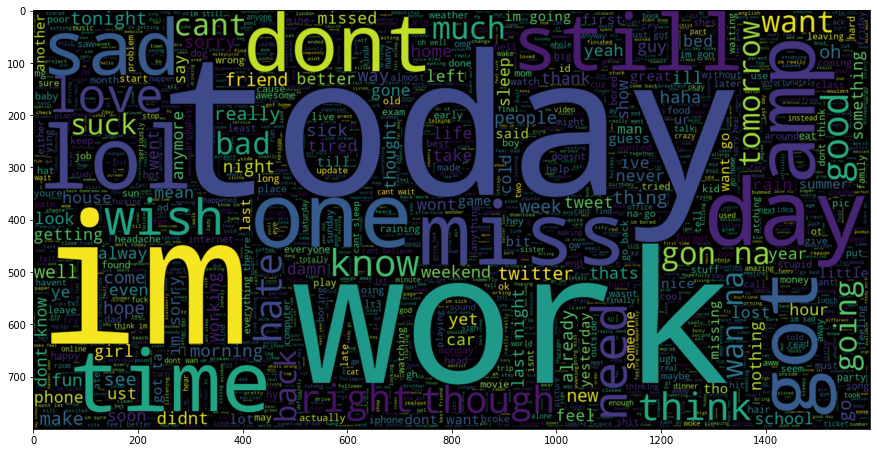

In [29]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

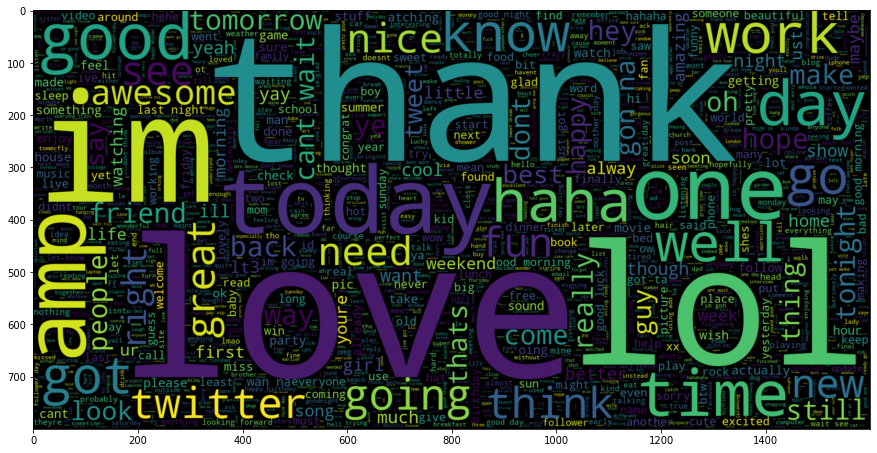

In [30]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [31]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170483


In [34]:
print(X.shape)
print(y.shape)

(200000, 170483)
(200000,)


In [37]:
import keras


from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 4861  204  664]
 [   0    0    0 ...   71 2809 1635]
 [   0    0    0 ...  372  838 2719]
 ...
 [   0    0    0 ...    0   94   31]
 [   0    0    0 ...  193  517   15]
 [   0    0    0 ...  314   20  312]]


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [41]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
5000/5000 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.7495
Epoch 1: val_accuracy improved from -inf to 0.76788, saving model to rnn_model.hdf5
5000/5000 [==============================] - 289s 57ms/step - loss: 0.5062 - accuracy: 0.7495 - val_loss: 0.4806 - val_accuracy: 0.7679
Epoch 2/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.7759
Epoch 2: val_accuracy improved from 0.76788 to 0.77160, saving model to rnn_model.hdf5
5000/5000 [==============================] - 279s 56ms/step - loss: 0.4664 - accuracy: 0.7759 - val_loss: 0.4774 - val_accuracy: 0.7716
Epoch 3/10
4999/5000 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.7843
Epoch 3: val_accuracy did not improve from 0.77160
5000/5000 [==============================] - 275s 55ms/step - loss: 0.4509 - accuracy: 0.7843 - val_loss: 0.4756 - val_accuracy: 0.7710
Epoch 4/10
4999/5000 [============================>.] - ETA: 0s - loss: 0.43

In [42]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative


In [43]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Positive
